### Data Loading
Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

Load Dataset

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 67.5MB/s]


In [5]:
local_zip = '/content/diabetes-health-indicators-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
diabetes = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
diabetes.shape

(253680, 22)

Dataset ini memiliki 253.680 baris dan 22 kolom.

### Exploratory Data Analysis
Deskripsi Variabel



1.   **Diabetes_binary** merupakan fitur target. Menunjukkan apakah seseorang mengidap diabetes. 0: tidak diabetes, 1: diabetes.
2.   **HighBP**: menunjukkan apakah seseorang punya darah tinggi (high blood pressure). 0: tidak, 1: ya.
3.   **HighChol**: menunjukkan apakah seseorang punya kolestrol tinggi. 0: tidak, 1: ya.
4.   **CholCheck**: menunjukkan apakah seseorang melakukan cek kolestrol dalam 5 tahun. 0: tidak, 1: ya.
5.   **BMI**: merupakan kategori berat badan seseorang.
6.   **Smoker**: menunjukkan apakah seseorang merokok setidaknya 100 batang rokok selama hidup. 0: tidak, 1: ya.
7.   **Stroke**: menunjukkan apakah seseorang mengidap stroke. 0: tidak, 1: ya.
8.   **HeartDiseaseorAttack**: menunjukkan apakah seseorang mengidap penyakit jantung. 0: tidak, 1: ya.
9.   **PhysActivity**: menunjukkan apakah seseorang melakukan aktivitas fisik (tidak termasuk pekerjaan) dalam 30 hari terakhir. 0: tidak, 1: ya.
10.  **Fruits**: menunjukkan apakah seseorang mengonsumsi buah minimal satu kali sehari. 0: tidak, 1: ya.
11.  **Veggies**: menunjukkan apakah seseorang mengonsumsi sayur minimal satu kali sehari. 0: tidak, 1: ya.
12.  **HvyAlcoholConsump**: merupakan konsumsi alkohol dalam seminggu (pria dewasa >= 14 minuman, wanita dewasa >= 7 minuman).
13.  **AnyHealthcare**: menunjukkan apakah seseorang memiliki jaminan kesehatan. 0: tidak, 1: ya.
14.  **NoDocbcCost**: menunjukkan apakah dalam 1 tahun terakhir seseorang memiliki kendala biaya saat ingin berobat ke dokter. 0: tidak, 1: ya.
15.  **GenHlth**: merupakan kondisi kesehatan secara umum. 1: sangat sangat bagus, 2: sangat bagus, 3: bagus, 4: lumayan, 5: buruk.
16.  **MentHlth**: menunjukkan berapa hari seseorang dalam kondisi mental yang buruk (0-30 hari).
17.  **PhysHlth**: merupakan luka fisik atau cidera dalam 30 hari terakhir (0-30 hari).
18.  **DiffWalk**: menunjukkan apakah seseorang punya kesulitan berjalan atau naik tangga. 0: tidak, 1: ya.
19.  **Sex**: jenis kelamin. 0: perempuan, 1: laki-laki.
20.  **Age**: kategori umur seseorang. 
21.  **Education**: tingkat pendidikan.
22.  **Income**: pendapatan.

Cek Info Data

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Semua variabel (kolom) memiliki tipe data float64

Cek Informasi Statistik

In [9]:
diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Cek Missing Data

In [10]:
diabetes.isnull().any().sum()

0

Tidak ada missing data pada dataset ini.

Cek Data Duplikat

In [11]:
duplicates = diabetes[diabetes.duplicated()]
len(duplicates)

24206

Terdapat 24206 baris duplikat. Baris-baris ini akan dihapus.

In [12]:
diabetes.drop_duplicates(inplace=True)
diabetes.shape

(229474, 22)

Visualisasi

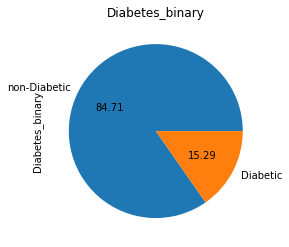

In [13]:
count = diabetes['Diabetes_binary'].value_counts()
count.plot(kind='pie', title='Diabetes_binary', labels=["non-Diabetic","Diabetic"], autopct='%.02f')

Sebanyak 84.71% responden tidak mengidap diabetes sedangkan 15.29% sisanya mengidap diabetes.

Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf0af37c10>,
      dtype=object)

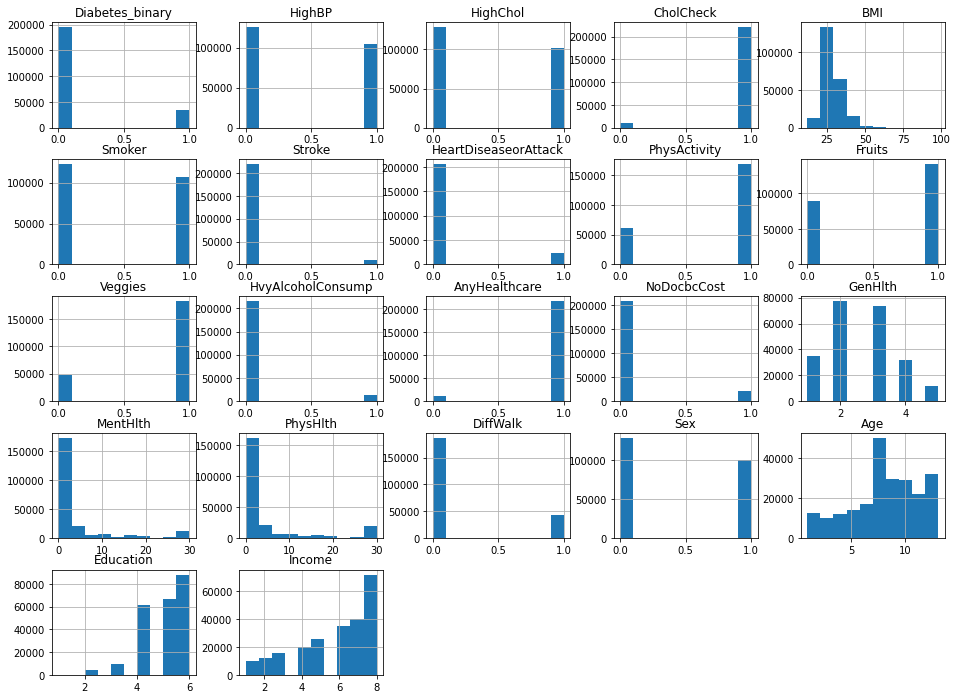

In [14]:
diabetes.hist(figsize=(16,12))

Dari grafik diatas, dapat diketahui distribusi data setiap variabel. 

Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix')

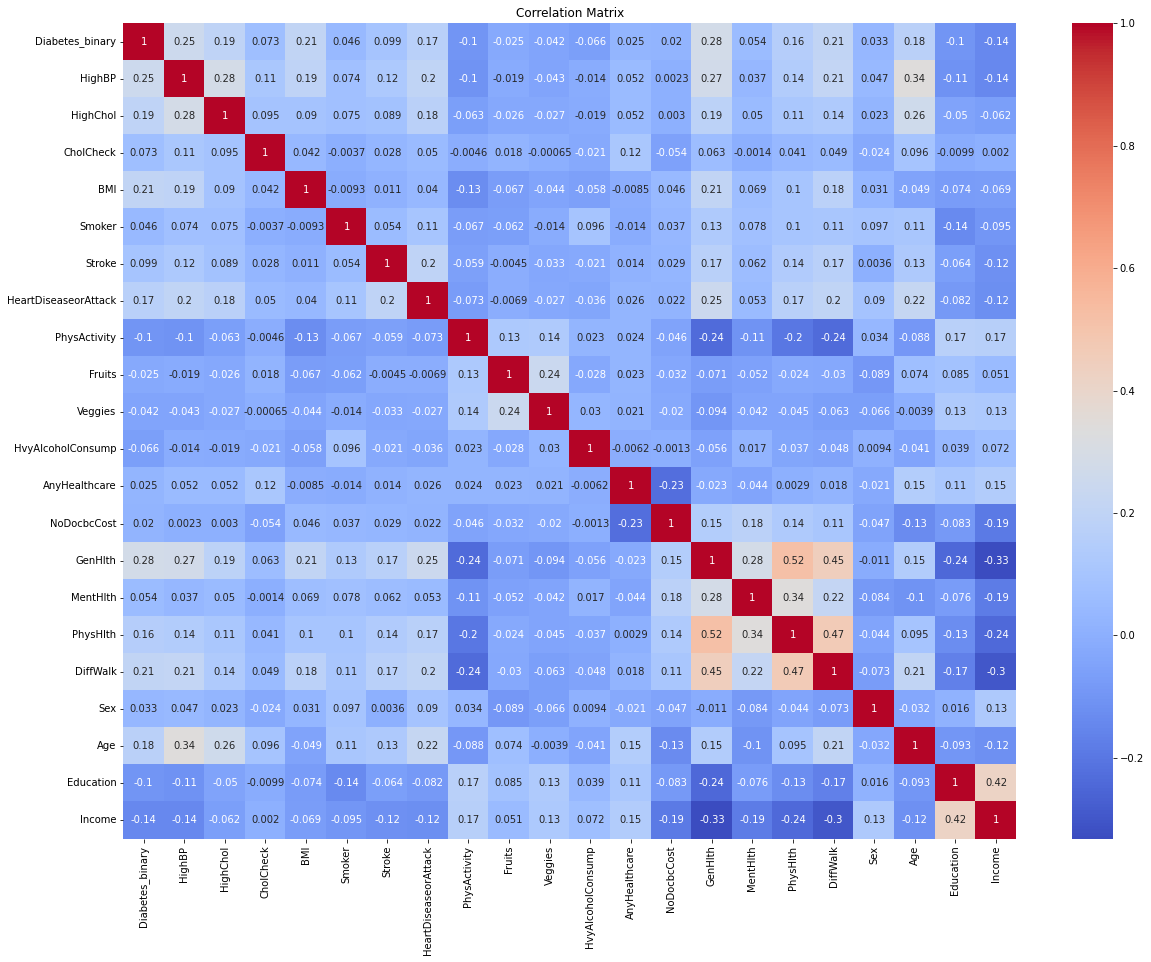

In [15]:
plt.figure(figsize=(20, 15))
sns.heatmap(data=diabetes.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

Dari matriks diatas, dapat diketahui bahwa fitur yang mempunyai korelasi yang kuat dengan fitur target, diantaranya HighBP, HighCol, BMI, HeartDiseaseorAttack, GenHlth, PhyscHlth, DiffWalk, dan Age.

### Data Preparation
Tran Test Split

In [16]:
from sklearn.model_selection import train_test_split

X = diabetes.drop('Diabetes_binary', axis=1)
Y = diabetes['Diabetes_binary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=123)

In [17]:
print(f'Jumlah train dataset: {len(X_train)}')
print(f'Jumlah test dataset: {len(X_test)}')

Jumlah train dataset: 206526
Jumlah test dataset: 22948


### Model Development

Algoritma K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_train)

print('Accuracy Score: {}'.format(accuracy_score(y_pred = knn_pred, y_true=Y_train)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_pred = knn_pred, y_true=Y_train)))

Accuracy Score: 0.8590250137997153
Mean Squared Error: 0.1409749862002847


Algoritma Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=55, n_jobs=-1)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_train)

print('Accuracy Score: {}'.format(accuracy_score(y_pred = rf_pred, y_true=Y_train)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_pred = rf_pred, y_true=Y_train)))

Accuracy Score: 0.8552773016472502
Mean Squared Error: 0.14472269835274978


### Evaluasi Model

Algoritma K-Nearest Neighbors

In [20]:
knn_eval = knn.predict(X_test)

print('Accuracy Score: {}'.format(accuracy_score(y_pred = knn_eval, y_true=Y_test)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_pred = knn_eval, y_true=Y_test)))

Accuracy Score: 0.8436029283597699
Mean Squared Error: 0.1563970716402301


Algoritma Random Forest

In [21]:
rf_eval = rf.predict(X_test)

print('Accuracy Score: {}'.format(accuracy_score(y_pred = rf_eval, y_true=Y_test)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_pred = rf_eval, y_true=Y_test)))

Accuracy Score: 0.852100400906397
Mean Squared Error: 0.14789959909360292


Prediksi

In [22]:
prediksi = X_test.iloc[:5].copy()

print(knn.predict(prediksi))
print(rf.predict(prediksi))
print('y_true:\n{}'.format(Y_test[:5]))

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
y_true:
38110     0.0
232040    0.0
76508     0.0
81448     0.0
173705    0.0
Name: Diabetes_binary, dtype: float64


Berdasarkan hasil prediksi diatas, kedua algoritma dapat memprediksi diabetes secara tepat.